# GSoC 2024 - Xinyu Wu

GSoC project Page: https://summerofcode.withgoogle.com/programs/2024/projects/eSwQPuN5

Project Summary:
1. design and implement global forecasting API
2. interface `pytorch-forecasting` models
3. extend `HFTransformersForecaster`, `NeuralForecast` models to global mode
4. extend forecasting benchmark and `NaiveForecaster` to global mode
5. documents and notebook for global forecasting

In [1]:
import os
import warnings

warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Contents

1. General introduction 
    - What is global forecastinging about and why we need it?
    - How is global forecasting formulated?
    - How global forecasting API is added to sktime?
    - Summary of PRs 

2. What can global forecasting API in sktime do? - examples
    - Global forecasting without exogeneous data
    - Global forecasting with exogeneous data
    - Global probabilistic forecasting

3. Takeaways

4. How to contiune the work?

5. Acknowledgement

# General introduction

### What is global forecastinging about and why we need it?

In classical time series forecasting, we tend to have one forecaster fitting on one time series and this forecaster can not forecast on other time series, which means that the data passed to `fit` function is the context to `predict` function, we can't give new context to `predict` function without refitting the model. This is not suitable for big data scenario where we have millions of time series but we do not want millions of forecasters. Instead we want one forecaster to learn from all data and has the generalization ability to directly forecast on data beyond training data.

Different from classical time series forecasting, a lot of deep learning models will 

- be trained on large dataset which containing many time series from many instances 
- predict on time series from other instances beyond training data. 

The ability to be trained on many series and predict beyond training data is called global forecasting.

### How is global forecasting formulated?

 - trained on dataset containing $n$ time series $S_{train}=\{x_{i_1}, x_{i_2}, x_{i_3}, ..., x_{i_n}\}$
 - predict on another dataset containing $m$ time series $S_{predict}=\{x_{j_1}, x_{j_2}, x_{j_3}, ..., x_{j_m}\}$
 - $m$ is not required to be equal to $n$
 - the length and cutoff of $S_{predict}$ are not required to be equal to the length and cutoff of $S_{train}$
 - there might or might not be intersection between the sets $\{i_1,.., i_n\}$ and $\{j_1, ... j_m\}$

### How global forecasting API is added to sktime

From the user perspective, the api changes can be summarized as a single line:

```py
# no global forecasting:
model.predict(X=X_test)
# with global forecasting:
model.predict(X=X_test, y=y_test)
```

By adding a new parameter to function `predict`, we allow users to pass new time series as context which is different from data passed to `fit`.

Internally, the new global forecasting API will decide to perform global forecasting or non-global forecasting according to whether `y` is passed to `predict`.

To add the new global forecasting API, four essential jobs need to be done:

1. new `_BaseGlobalForecaster` base class:
    - global forecasting ability checks
    - data structure checks
    - update `cutoff` from new time series
    - handle default probabilistic functions
    - other shared functionality
2. specific forecaster class with `multiindex` data support:
    - panel forecasting to learn from multiple time series
    - fit and predict on large dataset without copys of forecasters(prossibly neural networks)
3. specific forecaster class with global forecasting ablility:
    - hanle context different from data passed to `fit`
    - correct index and columns output adhere to the new instances passed to `predict`
4. ecosystem beyond global forecasters:
    - benchmark should be extended to split data in a global forecasting way
    - pipelines and compositors should be extended to take a global forecaster as a component to unlock the full potential of global forecasters.

### Summary of PRs

Focusing on global forecasting functionality of sktime, I created the following PRs:

1. [#6228](https://github.com/sktime/sktime/pull/6228) `pytorch-forecasting` with Global Forecasting API
   - new `_BaseGlobalForecaster` base class
   - `_PytorchForecastingAdapter` class to interface `pytorch-forecasting` models
   - two new forecasters `PytorchForecastingTFT` and `PytorchForecastingNBeats`
   - general `pytest` code for global forecasters in `TestAllGlobalForecasters` class

2. [#6551](https://github.com/sktime/sktime/pull/6551) DeepAR and NHiTS and Refinements for `pytorch-forecasting` Interface
   - two new forecasters `PytorchForecastingDeepAR`, `PytorchForecastingNHiTS` 
   - documention improvements for `pytorch-forecasting` models
   - loading exsiting models and broadcasting support for `pytorch-forecasting` models
   - other refinements and bugfix for `pytorch-forecasting` models and CI testing
  
3. [#6628](https://github.com/sktime/sktime/pull/6628) Global Probabilistic Forecasting for `pytorch-forecasting` Models
   - default probabilistic functions in `_BaseGlobalForecaster` base class
   - quantile forecasting ability for `pytorch-forecasting` models
   - `pytest` code for probabilistic forecasting in global mode
  
4. [#6774](https://github.com/sktime/sktime/pull/6774) Extending Forecasting Benchmark to Global Mode
   - global mode in `evaluate`, `forecasting_validation` and `ForecastingBenchmark`
   - `pytest` code for benchmark
  
5. [#6666](https://github.com/sktime/sktime/pull/6666) Global Forecasting API for NeuralForecast Models
   - `pd-multiindex` and `pd_multiindex_hier` inner_type support
   - global forecasting API
   - broadcasting support
  
6. [#6686](https://github.com/sktime/sktime/pull/6686) Global Forecasting API for `HFTransformersForecaster` Models
   - `pd-multiindex` and `pd_multiindex_hier` inner_type support
   - global forecasting API
   - broadcasting support

7. [#6868](https://github.com/sktime/sktime/pull/6868) Global NaiveForecaster 
   - adding global forecasting support by refitting on new data

8. [#6699](https://github.com/sktime/sktime/pull/6699) Notebook and Template For Global Forecasting API
   
9. Other PRs of Refinements and Bugfix: 
    - [#6891](https://github.com/sktime/sktime/pull/6891) Mute aggressive logging of `pytorch-forecasting` models
    - [#6845](https://github.com/sktime/sktime/pull/6845) Improvements for `TestAllGlobalForecasters`
    - [#6983](https://github.com/sktime/sktime/pull/6983) Add stallion dataset
    - [#6593](https://github.com/sktime/sktime/pull/6593) In BaseForecaster, move check for `capability:insample` to `_check_fh` boilerplate
    - [#6939](https://github.com/sktime/sktime/pull/6939) Reduce model size of pytorch-forecasting models
    - [#6830](https://github.com/sktime/sktime/pull/6830) Correct dependency tag for pytorch-forecasting forecasters
    - [#6093](https://github.com/sktime/sktime/pull/6093) Second test parameter set and bugfix for shapeDTW
    - [#6095](https://github.com/sktime/sktime/pull/6095) Second test parameter set for Kalman Filter
    - [skbase/#350](https://github.com/sktime/skbase/pull/350) StderrMute context manager

# What can global forecasting API in sktime do? - examples

The same UCI dataset [Individual Household Electric Power Consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) will be used in all three examples.

The data set contains measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

We are going to predict the power consumption.

Now let's load the dataset and perform some preprocess.

In [2]:
from copy import deepcopy

import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data as pandas dataframes)
data_raw = individual_household_electric_power_consumption.data.features

data = deepcopy(data_raw)
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data["Time"] = pd.to_datetime(data["Time"], format="%H:%M:%S")
data["Day"] = data["Date"].dt.day_of_year
data["Month"] = data["Date"].dt.month
data["Week"] = data["Date"].dt.isocalendar().week
data["Weekday"] = data["Date"].dt.dayofweek
data["Hour"] = data["Time"].dt.hour
data["Minute"] = data["Time"].dt.minute
data["Time"] = data["Time"].dt.hour * 60 + data["Time"].dt.minute
data["Date"] = data["Date"].dt.strftime("%Y-%m-%d").astype(str)
data = data.set_index(["Date", "Time"])
data = data.groupby("Date").apply(
    lambda x: None if "?" in x.values or len(x) != 1440 else x.droplevel(0)
)

y = data["Global_active_power"].to_frame().astype(float)
y = y.rename(columns={"Global_active_power": "PowerConsumption"})
X = data[["Day", "Week", "Month", "Weekday", "Hour", "Minute"]].astype(float)

Let's also split the data to train and test sets.

In [3]:
from sklearn.model_selection import train_test_split

from sktime.forecasting.base import ForecastingHorizon

max_prediction_length = 60
fh = ForecastingHorizon(
    list(range(1, max_prediction_length + 1)), is_relative=True, freq=1
)

train_ix, test_ix = train_test_split(
    y.index.levels[0], test_size=0.1, train_size=0.9, shuffle=False
)

y_train = y.loc[y.index.get_level_values(0).isin(train_ix)]
y_test = y.loc[y.index.get_level_values(0).isin(test_ix)]
X_train = X.loc[X.index.get_level_values(0).isin(train_ix)]
X_test = X.loc[X.index.get_level_values(0).isin(test_ix)]
y_true = y_test.groupby(level=[0]).apply(lambda x: x.droplevel([0]).iloc[-max(fh) :])
y_test = y_test.groupby(level=[0]).apply(lambda x: x.droplevel([0]).iloc[: -max(fh)])

`y_train` is the series we want to fit on which contains the first 90% of the time series instances.

In [4]:
y_train

PowerConsumption
Date       Time                  
2006-12-17 0                1.044
           1                1.520
           2                3.038
           3                2.974
           4                2.846
...                           ...
2010-07-04 1435             0.836
           1436             0.836
           1437             0.832
           1438             0.756
           1439             0.744

[1765440 rows x 1 columns]

`y_test` is the series we want to predict on which contains the last 10% of the time series instances.

In [5]:
y_test

PowerConsumption
Date       Time                  
2010-07-05 0                0.706
           1                0.630
           2                0.632
           3                0.628
           4                0.628
...                           ...
2010-11-25 1375             1.550
           1376             1.546
           1377             1.554
           1378             1.552
           1379             1.544

[182160 rows x 1 columns]

We can see that `y_train` and `y_test` are different on the first hierarchical level which indicates that they come from different instances. If we want to fit and predict on different instances, we need global forecasting.

We can initialize a gloabl forecaster to fit on `y_train` and predict on `y_test`.

### Global forecasting without exogeneous data

First, let's try to fit and predict without exogeneous data

In [6]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingNHiTS

model = PytorchForecastingNHiTS(
    trainer_params={
        "max_epochs": 1,  # for quick test
    }
)
model.fit(y=y_train, fh=fh)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
2024-08-23 16:50:57.982277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 16:50:57.998491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 16:50:57.998531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 16:50:58.010351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in ot

Epoch 0: 100%|██████████| 24730/24730 [22:31<00:00, 18.30it/s, v_num=20, train_loss_step=0.207, val_loss=0.282, train_loss_epoch=0.292]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 24730/24730 [22:34<00:00, 18.26it/s, v_num=20, train_loss_step=0.207, val_loss=0.282, train_loss_epoch=0.292]


PytorchForecastingNHiTS(trainer_params={'max_epochs': 1})

`y_pred` have the same instance index as `y_test` not `y_train`.

In [7]:
y_pred = model.predict(y=y_test)
y_pred

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


PowerConsumption
Date       Time                  
2010-07-05 1380          1.801106
           1381          1.798040
           1382          1.797435
           1383          1.797418
           1384          1.798824
...                           ...
2010-11-25 1435          1.177737
           1436          1.175195
           1437          1.217244
           1438          1.168114
           1439          1.148653

[7920 rows x 1 columns]

We can plot one series to see the result. As we only train the model for one epoch, we can not expect too much.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PowerConsumption'>)

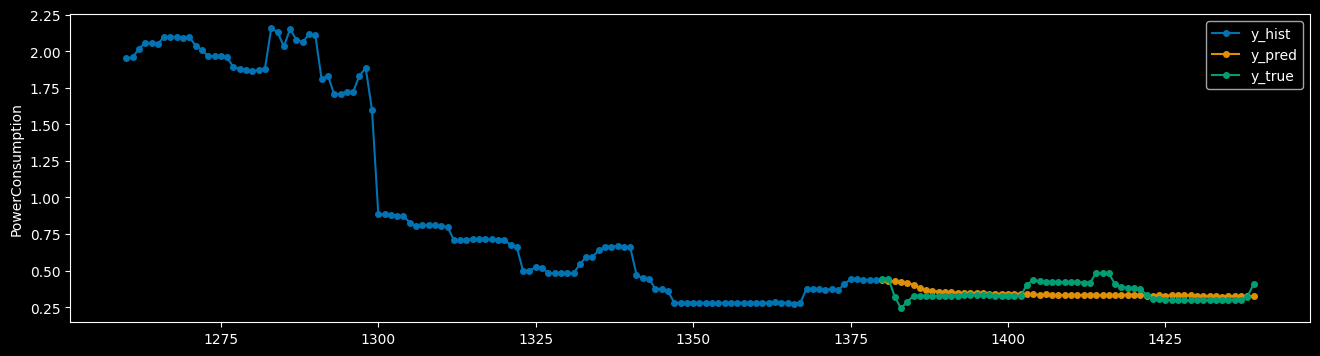

In [8]:
from sktime.utils.plotting import plot_series

ins = "2010-11-24"
plot_series(
    y_test.loc[ins].iloc[-2 * max_prediction_length :],
    y_pred.loc[ins],
    y_true.loc[ins],
    labels=["y_hist", "y_pred", "y_true"],
)

### Global forecasting with exogeneous data

Then let's try to fit and predict with exogeneous data.

When we predict with exogeneous data, we need to pass both `X_test` and `y_test` to `predict`.

`X_test` must contain all historical values and the time points to be predicted while `y_test` should only contain the historical values but not the time points to be predicted.

Global forecasters can handle hierachical data without broadcasting. Found more information of [hierachical data](https://www.sktime.net/en/stable/examples/01c_forecasting_hierarchical_global.html#Representation-of-hierarchical-and-panel-datatypes).

Let's add a new index level to the data.

In [9]:
def add_year_index(data):
    data_hier = deepcopy(data).reset_index()
    data_hier["Year"] = pd.to_datetime(data_hier["Date"]).dt.year
    data_hier["Date"] = (
        pd.to_datetime(data_hier["Date"]).dt.strftime("%m-%d").astype(str)
    )
    data_hier = data_hier.set_index(["Year", "Date", "Time"])
    return data_hier


X_train_hier = add_year_index(X_train)
X_test_hier = add_year_index(X_test)
y_train_hier = add_year_index(y_train)
y_test_hier = add_year_index(y_test)
y_true_hier = add_year_index(y_true)

In [10]:
X_test_hier

Day  Week  Month  Weekday  Hour  Minute
Year Date  Time                                           
2010 07-05 0     186.0  27.0    7.0      0.0   0.0     0.0
           1     186.0  27.0    7.0      0.0   0.0     1.0
           2     186.0  27.0    7.0      0.0   0.0     2.0
           3     186.0  27.0    7.0      0.0   0.0     3.0
           4     186.0  27.0    7.0      0.0   0.0     4.0
...                ...   ...    ...      ...   ...     ...
     11-25 1435  329.0  47.0   11.0      3.0  23.0    55.0
           1436  329.0  47.0   11.0      3.0  23.0    56.0
           1437  329.0  47.0   11.0      3.0  23.0    57.0
           1438  329.0  47.0   11.0      3.0  23.0    58.0
           1439  329.0  47.0   11.0      3.0  23.0    59.0

[190080 rows x 6 columns]

`X_train_hier` and `y_train_hier` have the same time index from 0 to 1439.

However `y_test_hier` is shorter than `X_test_hier`.

In [11]:
y_test_hier

PowerConsumption
Year Date  Time                  
2010 07-05 0                0.706
           1                0.630
           2                0.632
           3                0.628
           4                0.628
...                           ...
     11-25 1375             1.550
           1376             1.546
           1377             1.554
           1378             1.552
           1379             1.544

[182160 rows x 1 columns]

`X_test_hier` has the time index from 0 to 1439 but `y_test_hier` only has the time index from 0 to 1379. 

This is because we don't know (assuming) the values from 1380 to 1439 of `y_test_hier` which are going to be forecasted.

In [12]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingTFT

model = PytorchForecastingTFT(
    trainer_params={
        "max_epochs": 1,  # for quick test
    },
)

model.fit(y=y_train_hier, X=X_train_hier, fh=fh)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 112    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 0      | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 4.4 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 3.7 K  | train
7  | static_cont

Epoch 0: 100%|██████████| 24730/24730 [50:31<00:00,  8.16it/s, v_num=22, train_loss_step=0.265, val_loss=0.254, train_loss_epoch=0.296]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 24730/24730 [50:41<00:00,  8.13it/s, v_num=22, train_loss_step=0.265, val_loss=0.254, train_loss_epoch=0.296]


PytorchForecastingTFT(trainer_params={'max_epochs': 1})

`y_pred` have the same instance index as `y_test` not `y_train`.

In [13]:
y_pred = model.predict(fh=fh, X=X_test_hier, y=y_test_hier)
y_pred

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


PowerConsumption
Year Date  Time                  
2010 07-05 1380          1.799272
           1381          1.793950
           1382          1.790264
           1383          1.787184
           1384          1.784304
...                           ...
     11-25 1435          0.403756
           1436          0.396813
           1437          0.390115
           1438          0.383643
           1439          0.377381

[7920 rows x 1 columns]

We can plot one series to see the result. As we only train the model for one epoch, we can not expect too much.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PowerConsumption'>)

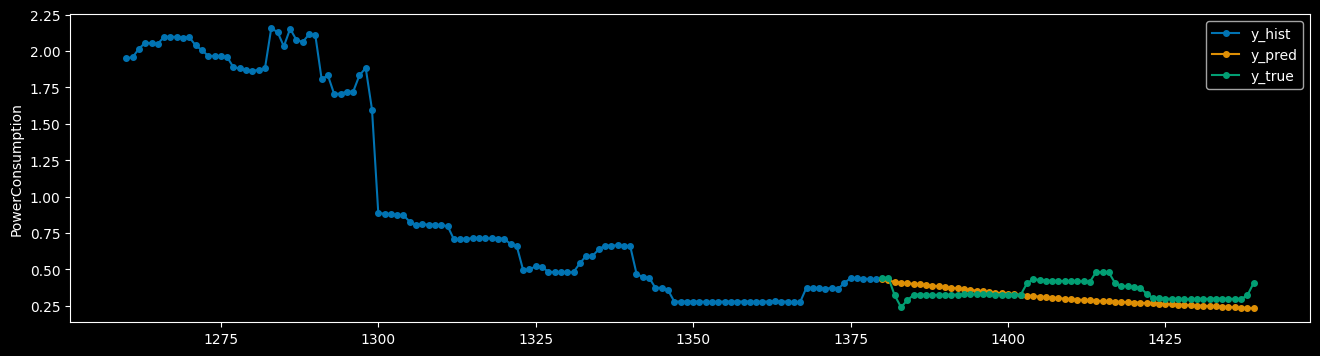

In [14]:
ins = (2010, "11-24")
points = 120
plot_series(
    y_test_hier.loc[ins].iloc[-2 * max_prediction_length :],
    y_pred.loc[ins],
    y_true_hier.loc[ins],
    labels=["y_hist", "y_pred", "y_true"],
)

### Global probabilistic forecasting

We can also do global probabilistic forecasting with the same form of API. Learn more about probabilistic forecasting from [sktime ducumention](https://www.sktime.net/en/stable/examples/01b_forecasting_proba.html)

In [15]:
alpha = [0.1, 0.25, 0.5, 0.75, 0.9]
y_pred_quantiles = model.predict_quantiles(X=X_test, y=y_test, alpha=alpha)
y_pred_quantiles

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


PowerConsumption                                        
                            0.10      0.25      0.50      0.75      0.90
Date       Time                                                         
2010-07-05 1380         1.040827  1.748186  1.799272  1.814488  1.859186
           1381         1.036457  1.741592  1.793950  1.816409  1.872707
           1382         1.032542  1.736033  1.790264  1.819128  1.887017
           1383         1.029201  1.731342  1.787184  1.820930  1.898373
           1384         1.026156  1.727070  1.784304  1.821980  1.907365
...                          ...       ...       ...       ...       ...
2010-11-25 1435         0.000000  0.000000  0.403756  1.008314  2.023455
           1436         0.000000  0.000000  0.396813  1.001430  2.019080
           1437         0.000000  0.000000  0.390115  0.994741  2.014896
           1438         0.000000  0.000000  0.383643  0.988226  2.010881
           1439         0.000000  0.000000  0.377381  0.981868  2.007013

[7920 rows x 5 columns]

`y_pred_quantiles` have the same instance index as `y_test` not `y_train`.

We can plot one series to see the result. As we only train the model for one epoch, we can not expect too much.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PowerConsumption'>)

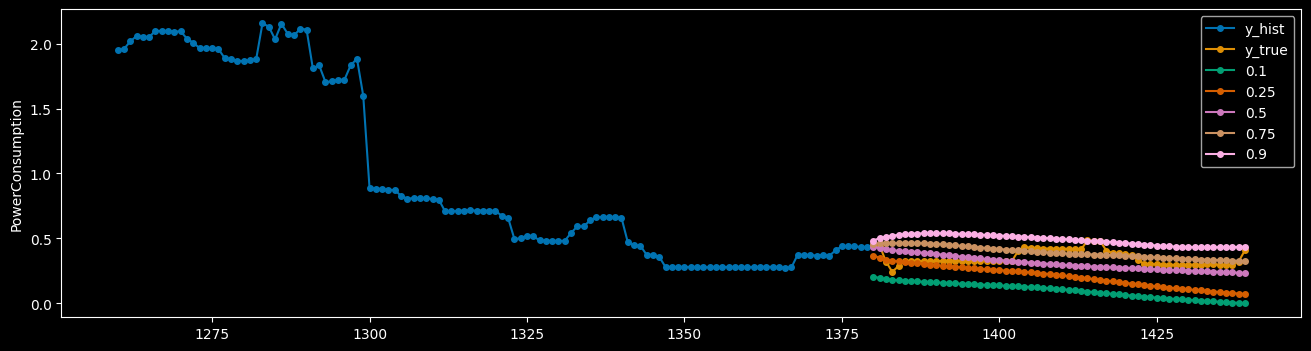

In [16]:
ins = "2010-11-24"
columns = [(y_pred_quantiles.loc[ins])[i] for i in y_pred_quantiles.columns]
plot_series(
    y_test.loc[ins].iloc[-2 * max_prediction_length :],
    y_true.loc[ins],
    *columns,
    labels=["y_hist", "y_true"] + alpha,
)

In [17]:
coverage = 0.9
y_pred_ints = model.predict_interval(X=X_test_hier, y=y_test_hier, coverage=coverage)
y_pred_ints

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


PowerConsumption          
                             0.9          
                           lower     upper
Year Date  Time                           
2010 07-05 1380         0.520414  1.887255
           1381         0.518229  1.906500
           1382         0.516271  1.927027
           1383         0.514600  1.943610
           1384         0.513078  1.956973
...                          ...       ...
     11-25 1435         0.000000  2.586787
           1436         0.000000  2.583828
           1437         0.000000  2.581068
           1438         0.000000  2.578483
           1439         0.000000  2.576050

[7920 rows x 2 columns]

`y_pred_ints` have the same instance index as `y_test_hier` not `y_train_hier`.

We can plot one series to see the result. As we only train the model for one epoch, we can not expect too much.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PowerConsumption'>)

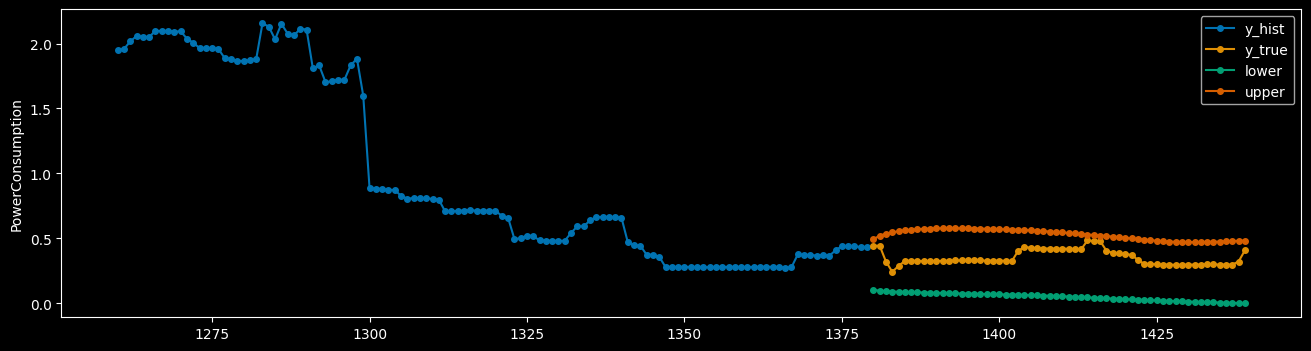

In [19]:
ins = (2010, "11-24")
columns = [(y_pred_ints.loc[ins])[i] for i in y_pred_ints.columns]
plot_series(
    y_test_hier.loc[ins].iloc[-2 * max_prediction_length :],
    y_true_hier.loc[ins],
    *columns,
    labels=["y_hist", "y_true", "lower", "upper"],
)

# Takeaways

I have learn a lot in the past 4 months.

1. This is my first contact of time series forecasting. I have learned what's endogenous and exogeneous data, what's point and probabilistic forecasting and much more.
2. This is my first time to contribute to the design and coding of a big and real library with thousands of stars in Github.
3. This is my first time to use `pytest` for code testing.
4. I have learned a lot about communication and collaboration cross time zones, countries and cultures. 
5. I have learned a lot about how a big python library is structed and organized.
6. I have learned a lot about how continuous integration and Github actions works.
7. I have learned a lot data manipulation technics of pandas dataframes.

# How to contiune the work?

1. Add global forecasting ability to more exsiting forecasters
2. Extend transformations and pipelines to global mode
3. Add foundation models and fine tuning support to sktime

# Acknowledgement

My sincerest gratitude to all mentors and mentees for their guidance, encouragement, assistance and collaboration throughout the project.

Special thanks to Benedikt Heidrich for the feedbacks and guidance as my primary mentor.

Special thanks to Franz Kiraly for the organization and feedbacks.

Special thanks to Anirban Ray for the feedbacks and code reviews.

Lastly, I am deeply grateful for the collective efforts and support of every developers of sktime and organizers of GSoC.